In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,PG
Date,
2020-01-17,0.002693
2020-01-21,-0.002535
2020-01-22,0.001743
2020-01-23,-0.004582
2020-01-24,0.001199


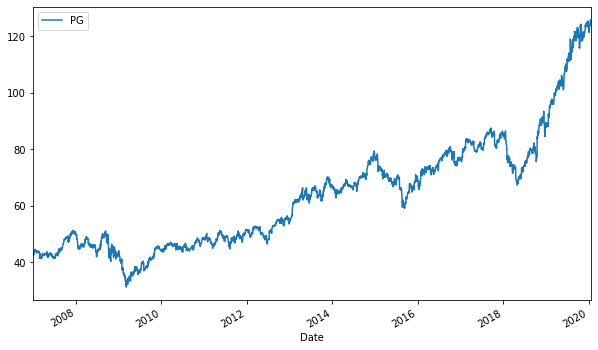

In [4]:
data.plot(figsize=(10, 6));

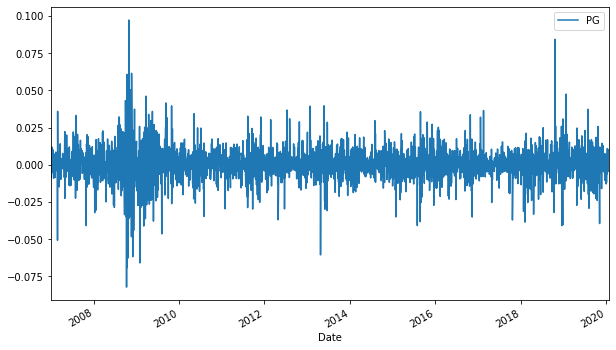

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000322
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.00012
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000262
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.010936
dtype: float64

******

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([0.00026213])

In [13]:
drift.values

array([0.00026213])

In [14]:
stdev.values

array([0.01093552])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[0.64780535, 0.92494938],
       [0.06460878, 0.0097651 ],
       [0.75070282, 0.76722523],
       [0.556122  , 0.29018956],
       [0.62568811, 0.20801351],
       [0.98536127, 0.7659963 ],
       [0.32716181, 0.08550348],
       [0.31088927, 0.22751596],
       [0.64777342, 0.41747355],
       [0.89424678, 0.19743889]])

In [17]:
norm.ppf(x)

array([[ 0.37940209,  1.43917397],
       [-1.51719461, -2.3352532 ],
       [ 0.6767031 ,  0.72973931],
       [ 0.14114423, -0.55283103],
       [ 0.32045456, -0.81333323],
       [ 2.17973036,  0.72572496],
       [-0.44776388, -1.36897544],
       [-0.49333126, -0.74705242],
       [ 0.37931609, -0.20836101],
       [ 1.24943382, -0.85080484]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.46159851, -0.83316946],
       [ 0.03142697, -0.10191147],
       [ 0.19790175, -0.25109946],
       [-0.27779987,  0.77166907],
       [ 0.63362535,  0.53654951],
       [ 0.50349914, -1.39406847],
       [ 1.47458529, -0.7712136 ],
       [-0.11055436,  1.3678977 ],
       [ 0.23923078, -1.98120814],
       [ 0.21082804,  0.31540802]])

In [19]:
t_intervals = 10000
iterations = 1000

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [20]:
daily_returns

array([[1.0009036 , 1.00387319, 0.99741553, ..., 0.98529089, 1.00547656,
        0.98664025],
       [1.00669567, 1.00005326, 1.01667285, ..., 1.01651899, 0.99866718,
        0.99655038],
       [1.00107839, 1.02180798, 0.98303378, ..., 0.9989691 , 0.98679872,
        1.00445051],
       ...,
       [0.99522319, 1.00055132, 1.00142187, ..., 0.99569223, 1.00237596,
        1.00812272],
       [0.99824253, 0.98152211, 0.99204143, ..., 0.98212378, 0.99612701,
        0.98416049],
       [1.01148337, 0.99764593, 1.00349352, ..., 0.99687846, 0.99893855,
        1.01181793]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [21]:
S0 = data.iloc[-1]
S0

PG    125.139999
Name: 2020-01-24 00:00:00, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
price_list[0] = S0
price_list

array([[125.13999939, 125.13999939, 125.13999939, ..., 125.13999939,
        125.13999939, 125.13999939],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [27]:
price_list

array([[ 125.13999939,  125.13999939,  125.13999939, ...,  125.13999939,
         125.13999939,  125.13999939],
       [ 125.97789498,  125.14666495,  127.22643984, ...,  127.20718555,
         124.97321043,  124.70831415],
       [ 126.11374864,  127.87586038,  125.06788848, ...,  127.07604799,
         123.32340433,  125.26332949],
       ...,
       [1302.92750677, 1147.74282535,  157.89494612, ..., 3565.22608954,
        3053.95935287,  339.28243703],
       [1300.63765546, 1126.53496043,  156.6383277 , ..., 3501.49331819,
        3042.13138674,  333.9083692 ],
       [1315.5733599 , 1123.88301562,  157.18554625, ..., 3490.56326656,
        3038.90232922,  337.85447585]])

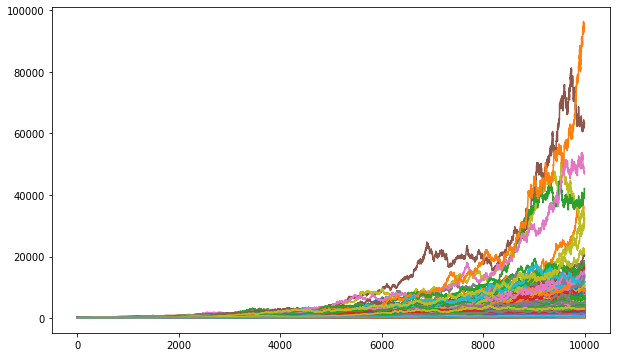

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);